In [2]:
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 7

import spacy
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer

ner = spacy.load('en_core_web_sm')


import string
import unicodedata

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
from wordcloud import STOPWORDS, WordCloud

rcParams['figure.figsize'] = 15, 7

import re
import unicodedata
from string import punctuation

import nltk
import spacy
from autocorrect import Speller, spell
from bs4 import BeautifulSoup
from contractions import contractions_dict
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from wordcloud import STOPWORDS, WordCloud
from sklearn.tree import DecisionTreeClassifier
import threading

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
yelp = pd.read_csv('yelp.csv')
yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [4]:
# non-na all values
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
# label is unbalanced...we do F1 score
yelp.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [6]:
#categorical variables analysis
yelp_insight_cat = pd.concat([yelp.isna().sum(), yelp.dtypes], axis=1)
yelp_insight_cat.columns = ['NaN', 'Type']
yelp_insight_cat=  pd.concat([yelp_insight_cat, yelp.describe(include='all').T], axis=1)
yelp_insight_cat = yelp_insight_cat.loc[yelp_insight_cat['Type'] == 'object', yelp_insight_cat.columns[0:6]]
series_unique = pd.Series([str(yelp[col].unique()) for col in yelp_insight_cat.index], name='Unique_vals', index=yelp_insight_cat.index)
yelp_insight_cat = pd.concat([yelp_insight_cat, series_unique], axis=1)
yelp_insight_cat

,NaN,Type,count,unique,top,freq,Unique_vals
business_id,0,object,10000,4174,JokKtdXU7zXHcr20Lrk29A,37,['9yKzy9PApeiPPOUJEtnvkg' 'ZRJwVLyzEJq1VAihDhY...
date,0,object,10000,1995,2011-03-28,21,['2011-01-26' '2011-07-27' '2012-06-14' ... '2...
review_id,0,object,10000,10000,fWKvX83p0-ka4JS3dc6E5A,1,['fWKvX83p0-ka4JS3dc6E5A' 'IjZ33sJrzXqU-0X6U8N...
text,0,object,10000,9998,Great service,2,['My wife took me here on my birthday for brea...
type,0,object,10000,1,review,10000,['review']
user_id,0,object,10000,6403,fczQCSmaWF78toLEmb0Zsw,38,['rLtl8ZkDX5vH5nAx9C3q5Q' '0a2KyEL0d3Yb1V6aivb...


***
### From above table, there are repeat users and businesses. It would b interesting to check on users which hop on different businesses with top feedbacks.
***

In [7]:
# numerical variables analysis
yelp_insight_num = pd.concat([yelp.isna().sum(), yelp.dtypes], axis=1)
yelp_insight_num.columns = ['NaN', 'Type']
yelp_insight_num=  pd.concat([yelp_insight_num, yelp.describe(include='all').T], axis=1)
yelp_insight_num = yelp_insight_num.loc[yelp_insight_num['Type'] != 'object', yelp_insight_num.columns]
yelp_insight_num.drop(['unique', 'top','freq'], axis=1, inplace=True)
yelp_insight_num

,NaN,Type,count,mean,std,min,25%,50%,75%,max
stars,0,int64,10000.0,3.7775,1.214636,1.0,3.0,4.0,5.0,5.0
cool,0,int64,10000.0,0.8768,2.067861,0.0,0.0,0.0,1.0,77.0
useful,0,int64,10000.0,1.4093,2.336647,0.0,0.0,1.0,2.0,76.0
funny,0,int64,10000.0,0.7013,1.907942,0.0,0.0,0.0,1.0,57.0


<AxesSubplot:xlabel='funny', ylabel='count'>

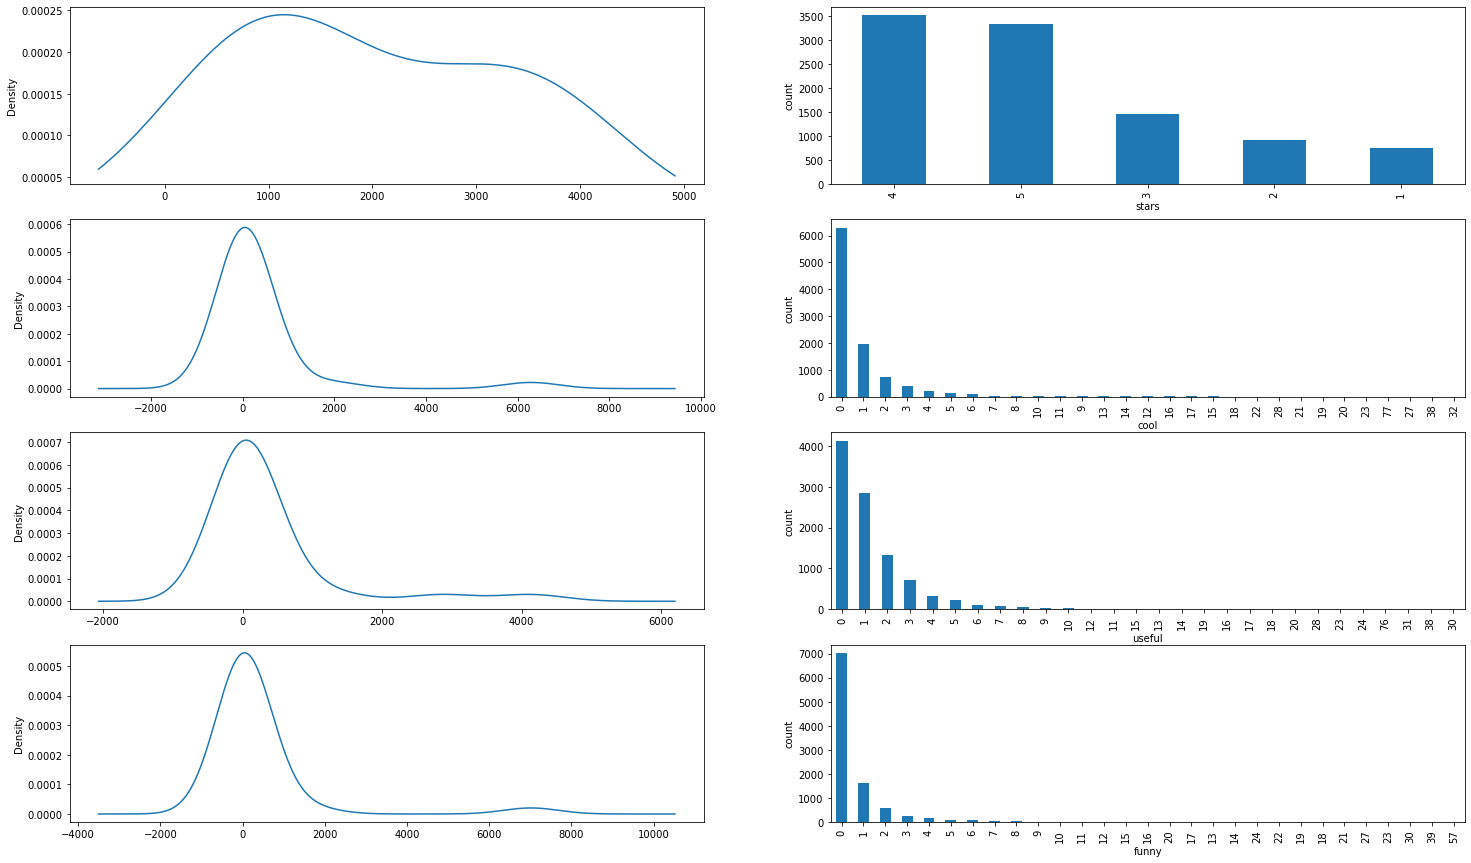

In [8]:
fig, axes = plt.subplots(4,2, figsize=(25,15))
ax= axes[0,0]
yelp.stars.value_counts().plot(kind='kde', xlabel='stars', ylabel = 'count', ax=ax)
ax= axes[0,1]
yelp.stars.value_counts().plot(kind='bar', xlabel='stars', ylabel = 'count', ax=ax)

ax= axes[1,0]
yelp.cool.value_counts().plot(kind='kde', xlabel='cool', ylabel = 'count', ax=ax)
ax= axes[1,1]
yelp.cool.value_counts().plot(kind='bar', xlabel='cool', ylabel = 'count', ax=ax)

ax= axes[2,0]
yelp.useful.value_counts().plot(kind='kde', xlabel='useful', ylabel = 'count', ax=ax)
ax= axes[2,1]
yelp.useful.value_counts().plot(kind='bar', xlabel='useful', ylabel = 'count', ax=ax)

ax= axes[3,0]
yelp.funny.value_counts().plot(kind='kde', xlabel='funny', ylabel = 'count', ax=ax)
ax= axes[3,1]
yelp.funny.value_counts().plot(kind='bar', xlabel='funny', ylabel = 'count', ax=ax)

***
### Max stars given as 4 followed by 5 and so on. But this data is for entire date range. Later we see some insights per quarter per year.
### Distributions of funny, cool, useful are consistent,  next check correlation with 'stars'.
***

<AxesSubplot:>

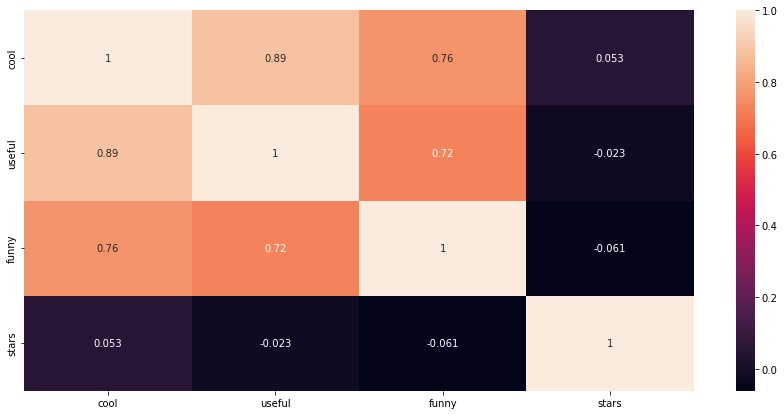

In [9]:
sns.heatmap(yelp[['cool', 'useful', 'funny', 'stars']].corr(), annot = True)

***
### funny, cool, useful does not show strong relationsip with stars however they are highly correlated
***

In [10]:
# convert date from str to datetime
yelp['date'] = pd.to_datetime(yelp['date'], format="%Y-%m-%d")
yelp.sort_values(by='date', ascending=True, inplace=True)
yelp['date'].describe()

C:\Users\vikas\anaconda3\envs\Python_3_7\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


count                   10000
unique                   1995
top       2011-03-28 00:00:00
freq                       21
first     2005-04-18 00:00:00
last      2013-01-05 00:00:00
Name: date, dtype: object

***
### Reviews date from 18/04/2005 to 05/01/2013
***

In [11]:
yelp['year'] = yelp['date'].dt.year
yelp['month'] = yelp['date'].dt.month
yelp['quarter'] = yelp['date'].dt.quarter
yelp['weekend'] = yelp['date'].dt.day_of_week > 5
yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,year,month,quarter,weekend
7945,B8ujMtvvpHyEQ2r_QlAT2w,2005-04-18,kwxmuNqc5EcaErD2zYpoKw,5,"Wood fired pizzas, scrumptious pasta dishes an...",review,6VZNGc2h2Bn-uyuEXgOt5g,5,3,0,2005,4,2,False
1817,7xbTnoyaai4JTkZ8rFPQTA,2005-07-03,H7tCJThvVA7a96c-x1mKnQ,2,Happy hour in Phoenix from 5PM to midnight on ...,review,VxRPbgauDdOcA3eg1uazXA,0,3,0,2005,7,3,True
9743,E28ht8IEiO6FZbKktSo0Xw,2005-07-10,ZLV71s7RzywyPiBT-6TIKQ,3,You're in 120 degree Scottsdale weather and yo...,review,VxRPbgauDdOcA3eg1uazXA,2,2,0,2005,7,3,True
4383,TnKMo7BnsbqFaeNL1GY3og,2005-12-16,lPGD4Ys57SpbC44_IqXwPg,3,decent. the potstickers were kind of good. I...,review,trGepkam5MTXDn4HBucdxw,1,2,1,2005,12,4,False
7170,8_wUsDlOE8Guecq5RZZjDg,2006-01-08,7ZujDqlte3aoLmFsa4P3oQ,1,I went here because all my friends were peeing...,review,wJp8U2qXl_jYUgyW9thjGA,0,1,4,2006,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,nts2OALwvyvfNh9focRZ3w,2013-01-05,DtfqqQryMmDWyRTdMx2XlQ,4,Great food. Service consistently blows. Sit at...,review,GZoFh9dJdp3FYk6FLDXs-w,1,1,1,2013,1,1,False
2620,9PrgqakLyqlxTTqvvfYNyA,2013-01-05,BedRV23Sb9fE03Y9eH7Jzw,4,I was a little bit scared to eat at this place...,review,jk_P-yYspg7uz-8xSCRdGA,0,0,0,2013,1,1,False
633,29hR24tcAM3JZaXfA5xCxQ,2013-01-05,lI8Bo4AMQT7C-zNLgvRasw,4,My husband surprised me with a stay-cation at ...,review,PWtlBs3PCH1l0DdypgEszw,0,1,0,2013,1,1,False
2264,bOB11LVavtN9PWTNwR52Tw,2013-01-05,DccfWDQOIKe4Cp8uuDwtjw,4,It appears that the service kinks have been wo...,review,UQUXdHJx2XmRMdXtMR6dtQ,1,1,0,2013,1,1,False


***
### Whether more people turn on weekdays than on weekends -> 
***

In [12]:
weekday_reviews = yelp[yelp['weekend'] == False][['stars', 'cool', 'useful', 'funny', 'year', 'quarter', 'text']].groupby(['year', 'quarter']).agg(['count', 'mean', 'sum'])
weekend_reviews = yelp[yelp['weekend'] == True][['stars', 'cool', 'useful', 'funny', 'year', 'quarter', 'text']].groupby(['year', 'quarter']).agg(['count', 'mean', 'sum'])

In [13]:
weekday_reviews

stars                  cool                useful                 \
             count      mean   sum count      mean  sum  count      mean  sum   
year quarter                                                                    
2005 2           1  5.000000     5     1  5.000000    5      1  3.000000    3   
     4           1  3.000000     3     1  1.000000    1      1  2.000000    2   
2006 1          14  4.285714    60    14  0.785714   11     14  0.714286   10   
     2           6  2.833333    17     6  0.333333    2      6  0.833333    5   
     3          13  3.538462    46    13  0.538462    7     13  1.307692   17   
     4          16  3.750000    60    16  0.312500    5     16  0.437500    7   
2007 1          72  3.736111   269    72  1.055556   76     72  1.472222  106   
     2          40  4.050000   162    40  2.275000   91     40  2.850000  114   
     3          79  3.987342   315    79  2.063291  163     79  2.417722  191   
     4          65  3.738462   243    65  1.769231  115     65  1.892308  123   
2008 1         117  3.777778   442   117  2.196581  257    117  2.401709  281   
     2         169  3.674556   621   169  2.266272  383    169  3.201183  541   
     3         180  3.816667   687   180  2.588889  466    180  3.027778  545   
     4         185  3.805405   704   185  2.135135  395    185  2.708108  501   
2009 1         262  3.835878  1005   262  1.950382  511    262  2.519084  660   
     2         227  3.740088   849   227  1.982379  450    227  2.704846  614   
     3         260  3.792308   986   260  1.588462  413    260  1.976923  514   
     4         238  3.626050   863   238  1.588235  378    238  2.142857  510   
2010 1         400  3.795000  1518   400  1.092500  437    400  1.687500  675   
     2         357  3.829132  1367   357  0.795518  284    357  1.425770  509   
     3         432  3.787037  1636   432  0.805556  348    432  1.298611  561   
     4         391  3.795396  1484   391  0.631714  247    391  1.140665  446   
2011 1         619  3.893376  2410   619  0.617124  382    619  1.218094  754   
     2         615  3.697561  2274   615  0.539837  332    615  1.304065  802   
     3         591  3.829103  2263   591  0.527919  312    591  1.003384  593   
     4         561  3.814617  2140   561  0.573975  322    561  0.978610  549   
2012 1         670  3.780597  2533   670  0.404478  271    670  0.808955  542   
     2         698  3.765043  2628   698  0.498567  348    698  1.247851  871   
     3         645  3.772093  2433   645  0.410853  265    645  1.018605  657   
     4         556  3.758993  2090   556  0.429856  239    556  0.739209  411   
2013 1          52  4.019231   209    52  0.423077   22     52  0.576923   30   

             funny                 
             count      mean  sum  
year quarter                       
2005 2           1  0.000000    0  
     4           1  1.000000    1  
2006 1          14  0.214286    3  
     2           6  0.333333    2  
     3          13  0.384615    5  
     4          16  0.187500    3  
2007 1          72  1.055556   76  
     2          40  1.300000   52  
     3          79  1.417722  112  
     4          65  1.030769   67  
2008 1         117  1.341880  157  
     2         169  1.934911  327  
     3         180  2.200000  396  
     4         185  1.589189  294  
2009 1         262  1.519084  398  
     2         227  1.621145  368  
     3         260  1.326923  345  
     4         238  1.231092  293  
2010 1         400  0.860000  344  
     2         357  0.669468  239  
     3         432  0.597222  258  
     4         391  0.547315  214  
2011 1         619  0.549273  340  
     2         615  0.463415  285  
     3         591  0.497462  294  
     4         561  0.349376  196  
2012 1         670  0.352239  236  
     2         698  0.383954  268  
     3         645  0.412403  266  
     4         556  0.381295  212  
2013 1          52  0.288462   15

In [14]:
weekend_reviews

stars                 cool                useful                 \
             count      mean  sum count      mean  sum  count      mean  sum   
year quarter                                                                   
2005 3           2  2.500000    5     2  1.000000    2      2  2.500000    5   
2006 1           1  1.000000    1     1  0.000000    0      1  1.000000    1   
     2           2  4.500000    9     2  0.000000    0      2  2.000000    4   
     3           2  3.500000    7     2  2.500000    5      2  2.500000    5   
     4           1  4.000000    4     1  2.000000    2      1  2.000000    2   
2007 1           4  3.500000   14     4  0.750000    3      4  2.000000    8   
     2           3  3.666667   11     3  1.333333    4      3  1.000000    3   
     3          11  3.545455   39    11  1.727273   19     11  2.000000   22   
     4          11  3.636364   40    11  1.636364   18     11  2.181818   24   
2008 1          24  4.041667   97    24  2.291667   55     24  2.625000   63   
     2          25  3.680000   92    25  1.960000   49     25  3.040000   76   
     3          34  3.470588  118    34  2.411765   82     34  2.705882   92   
     4          31  3.322581  103    31  1.838710   57     31  1.903226   59   
2009 1          51  3.705882  189    51  1.294118   66     51  1.666667   85   
     2          42  3.809524  160    42  2.571429  108     42  3.166667  133   
     3          46  3.739130  172    46  1.739130   80     46  2.239130  103   
     4          45  3.822222  172    45  1.644444   74     45  1.933333   87   
2010 1          70  3.757143  263    70  0.871429   61     70  1.457143  102   
     2          63  3.888889  245    63  0.888889   56     63  1.412698   89   
     3          79  3.784810  299    79  0.721519   57     79  1.253165   99   
     4          60  3.650000  219    60  0.566667   34     60  1.166667   70   
2011 1          99  3.656566  362    99  0.232323   23     99  0.989899   98   
     2         107  3.663551  392   107  0.551402   59    107  1.093458  117   
     3         104  3.557692  370   104  0.567308   59    104  1.009615  105   
     4          95  3.778947  359    95  0.684211   65     95  0.926316   88   
2012 1         112  3.741071  419   112  0.366071   41    112  0.857143   96   
     2         114  3.710526  423   114  0.526316   60    114  1.350877  154   
     3         124  3.782258  469   124  0.354839   44    124  0.750000   93   
     4         106  3.773585  400   106  0.443396   47    106  0.622642   66   

             funny                
             count      mean sum  
year quarter                      
2005 3           2  0.000000   0  
2006 1           1  4.000000   4  
     2           2  0.000000   0  
     3           2  1.500000   3  
     4           1  0.000000   0  
2007 1           4  0.750000   3  
     2           3  1.666667   5  
     3          11  0.727273   8  
     4          11  1.363636  15  
2008 1          24  0.916667  22  
     2          25  1.160000  29  
     3          34  2.117647  72  
     4          31  1.387097  43  
2009 1          51  0.921569  47  
     2          42  1.952381  82  
     3          46  1.304348  60  
     4          45  0.933333  42  
2010 1          70  0.757143  53  
     2          63  0.571429  36  
     3          79  0.620253  49  
     4          60  0.366667  22  
2011 1          99  0.272727  27  
     2         107  0.448598  48  
     3         104  0.461538  48  
     4          95  0.663158  63  
2012 1         112  0.392857  44  
     2         114  0.342105  39  
     3         124  0.387097  48  
     4         106  0.330189  35

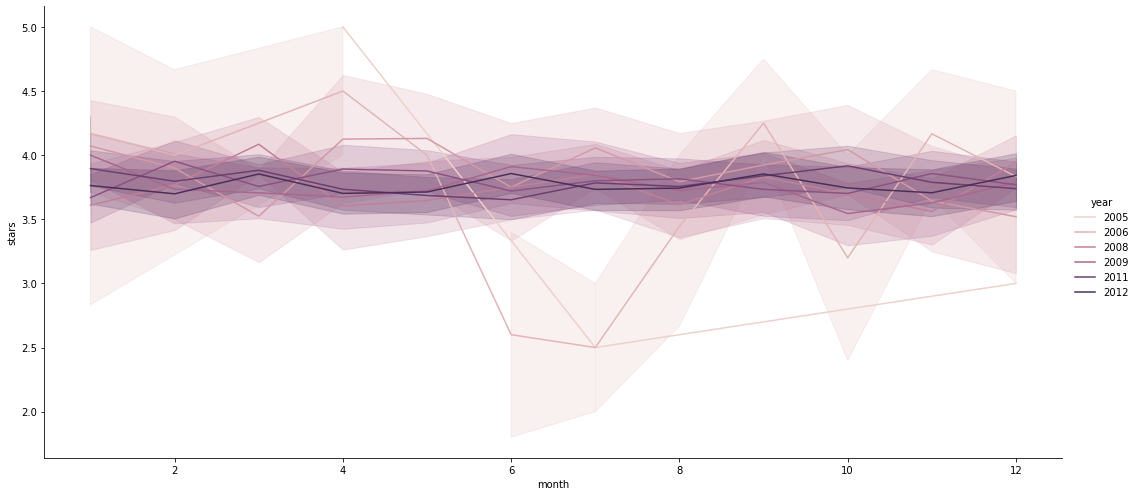

In [15]:
sns.relplot(data=yelp, x="month", y="stars", hue="year", kind="line", aspect=15/7, height = 7)

***
### Dark colored lines confirms average reviews remain consistent in later years. Confirm with bar plot
***

<AxesSubplot:xlabel='year,quarter'>

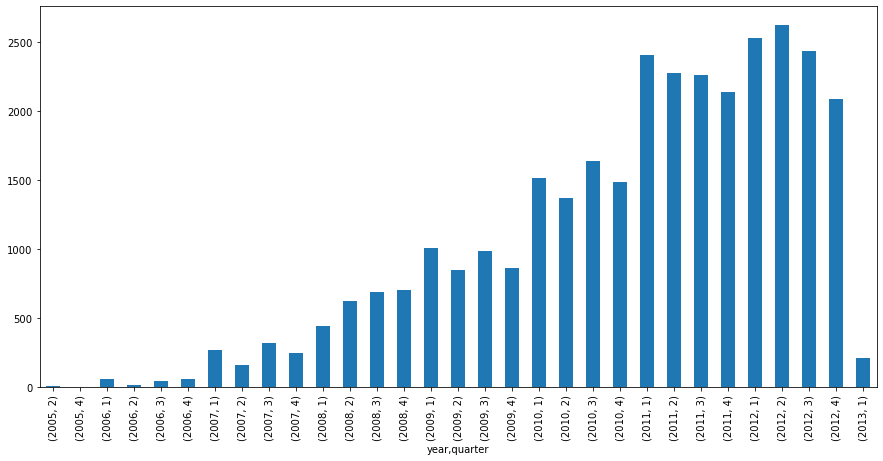

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
weekday_reviews[( 'stars',   'sum')].plot(kind='bar', ax=ax)

<AxesSubplot:xlabel='year,quarter'>

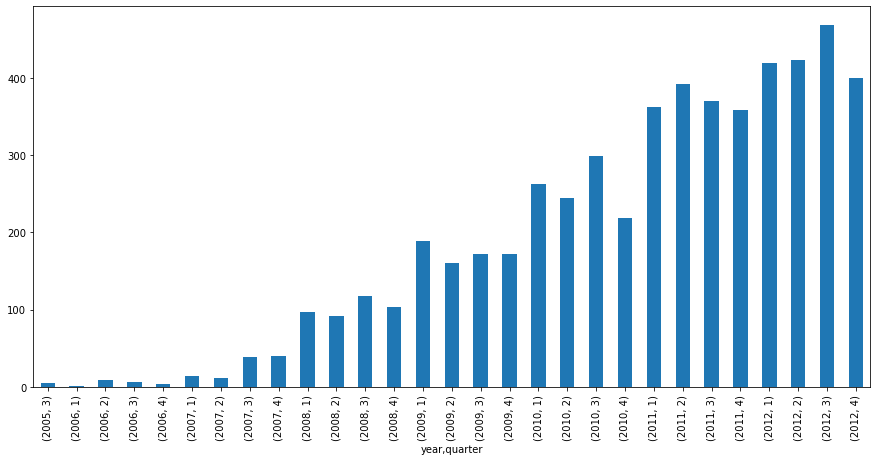

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
weekend_reviews[( 'stars',   'sum')].plot(kind='bar', ax=ax)

***
### From above count of reviews(stars), year on year, businesses got more and more people on weekdays than on weekends
### Can it be because of population explosion across top cities ?
***

<AxesSubplot:xlabel='year,quarter'>

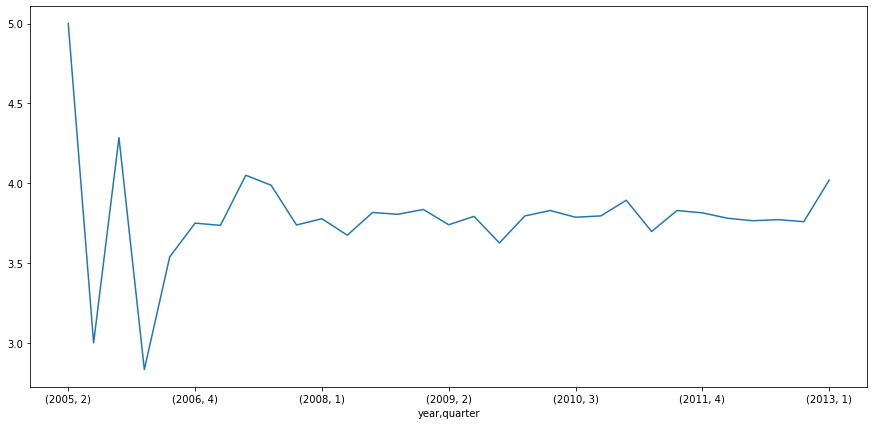

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
weekday_reviews[('stars', 'mean')].plot(ax=ax)

<AxesSubplot:xlabel='year,quarter'>

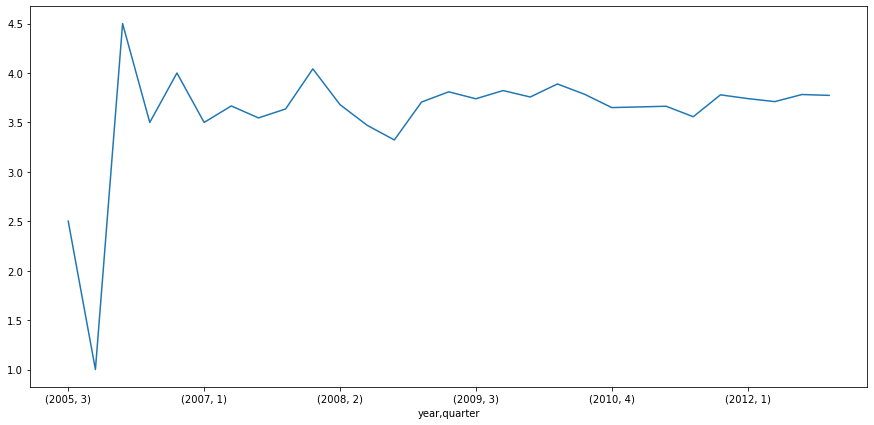

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
weekend_reviews[('stars', 'mean')].plot(ax=ax)

***
### For period 2005 -2007, there is dip in ratings on weekdays whereas there is sharp rise on weekends.
### After 2007 we are getting consistent ratings above 3.5. Businesses did pick up on both weekdays/weekends and maintained consistent.
***

***
### User Analysis
***

In [20]:
user_agg = yelp.groupby('user_id').agg({'review_id': ['count'], 'date': ['min', 'max'], 'useful': ['sum'], 'funny':['sum'], 'cool':['sum'], 'stars': ['mean']})
user_agg

review_id       date            useful funny cool stars
                           count        min        max    sum   sum  sum  mean
user_id                                                                       
--65q1FpAL_UQtVZ2PTGew         5 2010-08-03 2011-06-29     16     4   13   4.4
--VxRvXk3b8FwsSbC2Zpxw         1 2011-05-16 2011-05-16      0     0    0   3.0
--rlgfAvvi0BtfRDA1p-VQ         1 2011-10-10 2011-10-10      0     0    0   5.0
-2S6keboidRPly-h5lBfkA         1 2011-04-16 2011-04-16      1     0    0   2.0
-2XA34d6OGYEUuzqC7yhBg         1 2010-02-18 2010-02-18      1     0    0   4.0
...                          ...        ...        ...    ...   ...  ...   ...
zwjIdDClpnTqsly-O1Pe7g         1 2012-01-04 2012-01-04      0     0    0   4.0
zxcrlC3cmH5S2TGIxuLwBw         1 2012-03-04 2012-03-04      0     1    0   1.0
zxnoE5IjuWoI9mF1gwyg5w         1 2012-03-21 2012-03-21      0     0    0   3.0
zzhdnNeg65wupOXqYtGyJw         1 2012-10-07 2012-10-07      0     0    0   4.0
zzmRKNph-pBHDL2qwGv9Fw         1 2011-03-04 2011-03-04      4     4    1   1.0

[6403 rows x 7 columns]

***
### Top 10 users
***

In [21]:
user_agg = user_agg.sort_values(by=[('review_id', 'count')], ascending=False)
user_agg_top_10 =  user_agg.head(10)
user_agg_top_10

review_id       date            useful funny cool  \
                           count        min        max    sum   sum  sum   
user_id                                                                    
fczQCSmaWF78toLEmb0Zsw        38 2007-12-14 2012-07-19    293   147  263   
0CMz8YaO3f8xu4KqQgKb9Q        25 2007-01-22 2007-07-20     45    34   44   
90a6z--_CUrl84aCzZyPsg        22 2008-02-27 2012-07-23     59    22   44   
4ozupHULqGyO42s3zNUzOQ        18 2010-06-26 2012-12-10    130    59   97   
0mqHhdKEdak_A1FBhFNXqA        18 2010-04-19 2012-10-19     12    11    2   
wHg1YkCzdZq9WBJOTRgxHQ        17 2008-06-13 2012-02-01    100    79   89   
0bNXP9quoJEgyVZu9ipGgQ        16 2008-12-05 2012-04-28    115    58   88   
_PzSNcfrCjeBxSLXRoMmgQ        16 2009-11-11 2013-01-04     23    13   17   
JgDkCER12uiv4lbpmkZ9VA        15 2008-05-27 2011-01-29     30    15   15   
joIzw_aUiNvBTuGoytrH7g        15 2009-03-29 2012-01-12     34    18   22   

                           stars  
                            mean  
user_id                           
fczQCSmaWF78toLEmb0Zsw  4.131579  
0CMz8YaO3f8xu4KqQgKb9Q  4.120000  
90a6z--_CUrl84aCzZyPsg  3.954545  
4ozupHULqGyO42s3zNUzOQ  4.388889  
0mqHhdKEdak_A1FBhFNXqA  3.055556  
wHg1YkCzdZq9WBJOTRgxHQ  3.823529  
0bNXP9quoJEgyVZu9ipGgQ  2.875000  
_PzSNcfrCjeBxSLXRoMmgQ  3.750000  
JgDkCER12uiv4lbpmkZ9VA  2.933333  
joIzw_aUiNvBTuGoytrH7g  2.933333

***
### Lets check whether the top 10 users are returning users...from below it seems not since unique and count is same
***

In [22]:
user_agg_top_10_busin = pd.merge(user_agg_top_10.reset_index()['user_id'], yelp[['user_id', 'business_id']], on='user_id', how='inner')
user_agg_top_10_busin.groupby('user_id').describe()

business_id                                    
                             count unique                     top freq
user_id                                                               
0CMz8YaO3f8xu4KqQgKb9Q          25     25  pdxyZdnwltQXcu-kD5rpXQ    1
0bNXP9quoJEgyVZu9ipGgQ          16     16  OypZxwm-jS9QfUwgBmzeyw    1
0mqHhdKEdak_A1FBhFNXqA          18     18  bfDQai9X59uWK-XgP0t6rA    1
4ozupHULqGyO42s3zNUzOQ          18     18  kEyCMHBnohaWc81omLDfYg    1
90a6z--_CUrl84aCzZyPsg          22     22  KwGQqUCpHHhOhVqyOL2QTA    1
JgDkCER12uiv4lbpmkZ9VA          15     15  8o-NLKy_XfbJtqljX9XLCA    1
_PzSNcfrCjeBxSLXRoMmgQ          16     16  ntN85eu27C04nwyPa8IHtw    1
fczQCSmaWF78toLEmb0Zsw          38     38  B8ujMtvvpHyEQ2r_QlAT2w    1
joIzw_aUiNvBTuGoytrH7g          15     15  luCSjoNQ9q_0QIjKKOy2pQ    1
wHg1YkCzdZq9WBJOTRgxHQ          17     17  7QSYBp2-AOdyUJXEaLnbgA    1

***
### Text Analysis
***

In [23]:
yelp['word_count'] = yelp.text.apply(len)
yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,year,month,quarter,weekend,word_count
7945,B8ujMtvvpHyEQ2r_QlAT2w,2005-04-18,kwxmuNqc5EcaErD2zYpoKw,5,"Wood fired pizzas, scrumptious pasta dishes an...",review,6VZNGc2h2Bn-uyuEXgOt5g,5,3,0,2005,4,2,False,276
1817,7xbTnoyaai4JTkZ8rFPQTA,2005-07-03,H7tCJThvVA7a96c-x1mKnQ,2,Happy hour in Phoenix from 5PM to midnight on ...,review,VxRPbgauDdOcA3eg1uazXA,0,3,0,2005,7,3,True,459
9743,E28ht8IEiO6FZbKktSo0Xw,2005-07-10,ZLV71s7RzywyPiBT-6TIKQ,3,You're in 120 degree Scottsdale weather and yo...,review,VxRPbgauDdOcA3eg1uazXA,2,2,0,2005,7,3,True,481
4383,TnKMo7BnsbqFaeNL1GY3og,2005-12-16,lPGD4Ys57SpbC44_IqXwPg,3,decent. the potstickers were kind of good. I...,review,trGepkam5MTXDn4HBucdxw,1,2,1,2005,12,4,False,354
7170,8_wUsDlOE8Guecq5RZZjDg,2006-01-08,7ZujDqlte3aoLmFsa4P3oQ,1,I went here because all my friends were peeing...,review,wJp8U2qXl_jYUgyW9thjGA,0,1,4,2006,1,1,True,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,nts2OALwvyvfNh9focRZ3w,2013-01-05,DtfqqQryMmDWyRTdMx2XlQ,4,Great food. Service consistently blows. Sit at...,review,GZoFh9dJdp3FYk6FLDXs-w,1,1,1,2013,1,1,False,76
2620,9PrgqakLyqlxTTqvvfYNyA,2013-01-05,BedRV23Sb9fE03Y9eH7Jzw,4,I was a little bit scared to eat at this place...,review,jk_P-yYspg7uz-8xSCRdGA,0,0,0,2013,1,1,False,350
633,29hR24tcAM3JZaXfA5xCxQ,2013-01-05,lI8Bo4AMQT7C-zNLgvRasw,4,My husband surprised me with a stay-cation at ...,review,PWtlBs3PCH1l0DdypgEszw,0,1,0,2013,1,1,False,1483
2264,bOB11LVavtN9PWTNwR52Tw,2013-01-05,DccfWDQOIKe4Cp8uuDwtjw,4,It appears that the service kinks have been wo...,review,UQUXdHJx2XmRMdXtMR6dtQ,1,1,0,2013,1,1,False,634


In [24]:
yelp.word_count.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: word_count, dtype: float64

***
### Average words in reviews is ~710 but this is across entire date range. We check yearly review ratings/count below.
***


<AxesSubplot:xlabel='year'>

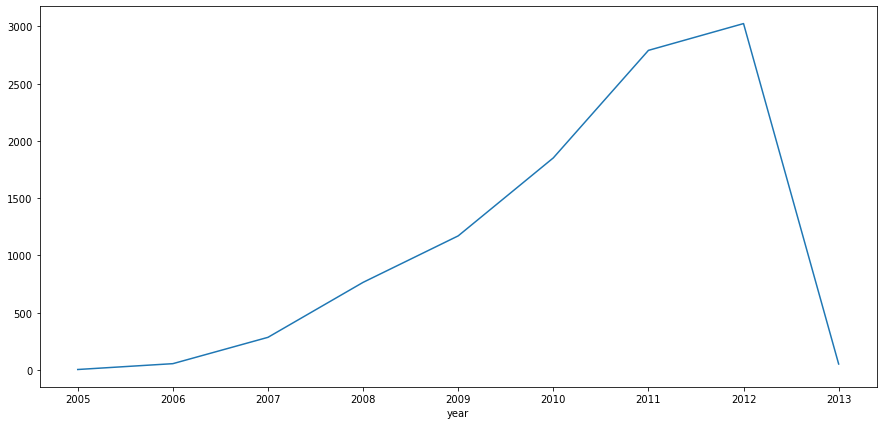

In [25]:
yelp.groupby('year')['user_id'].count().plot()

***
### There is gradual increase in users/reviews for businesses, picking up in late 2009.
### Let's see Yearly count of reviews and wordcounts
***

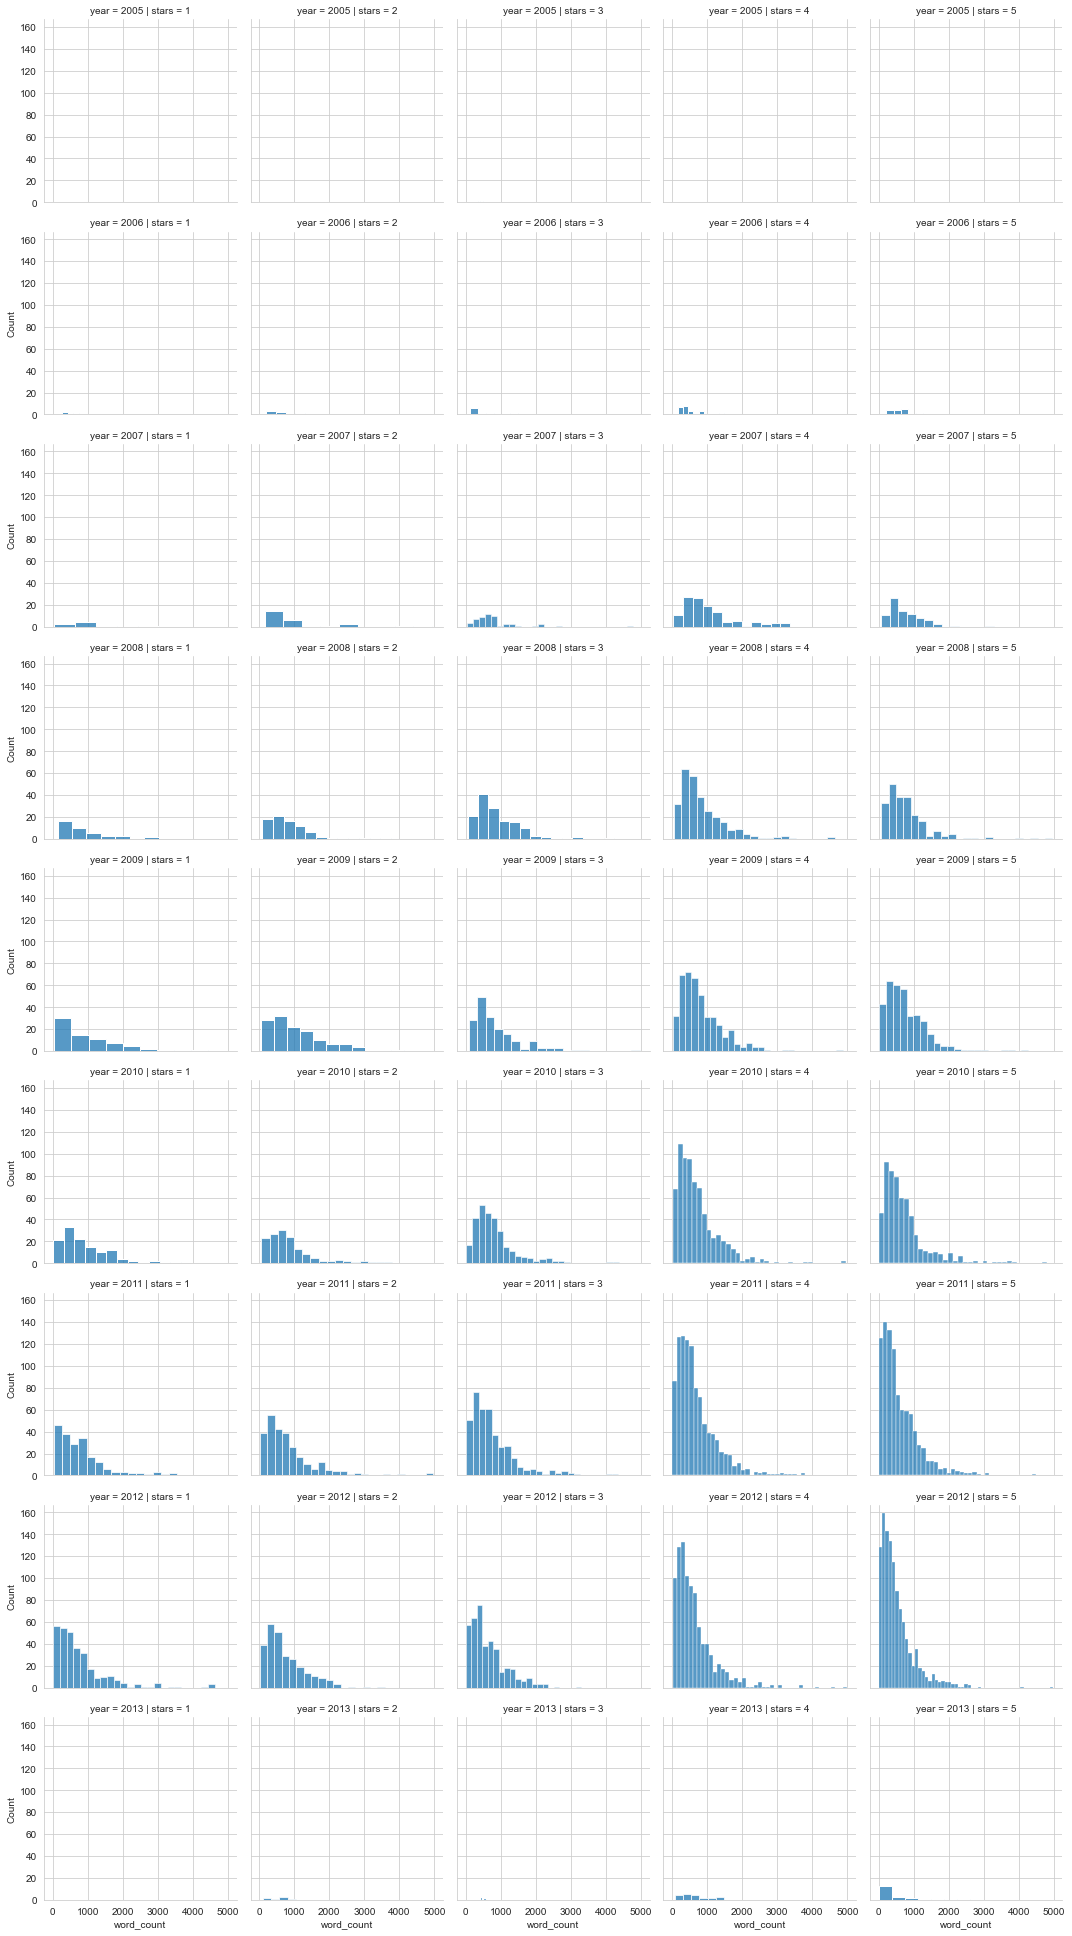

In [26]:
sns.set_style('whitegrid')
g = sns.FacetGrid(data=yelp, col='stars',row='year')
g = g.map(sns.histplot, 'word_count')


***
### From above graph, count of positive reviews(with high stars) is higher than negative reviews(lesser stars) for all years
***

C:\Users\vikas\anaconda3\envs\Python_3_7\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


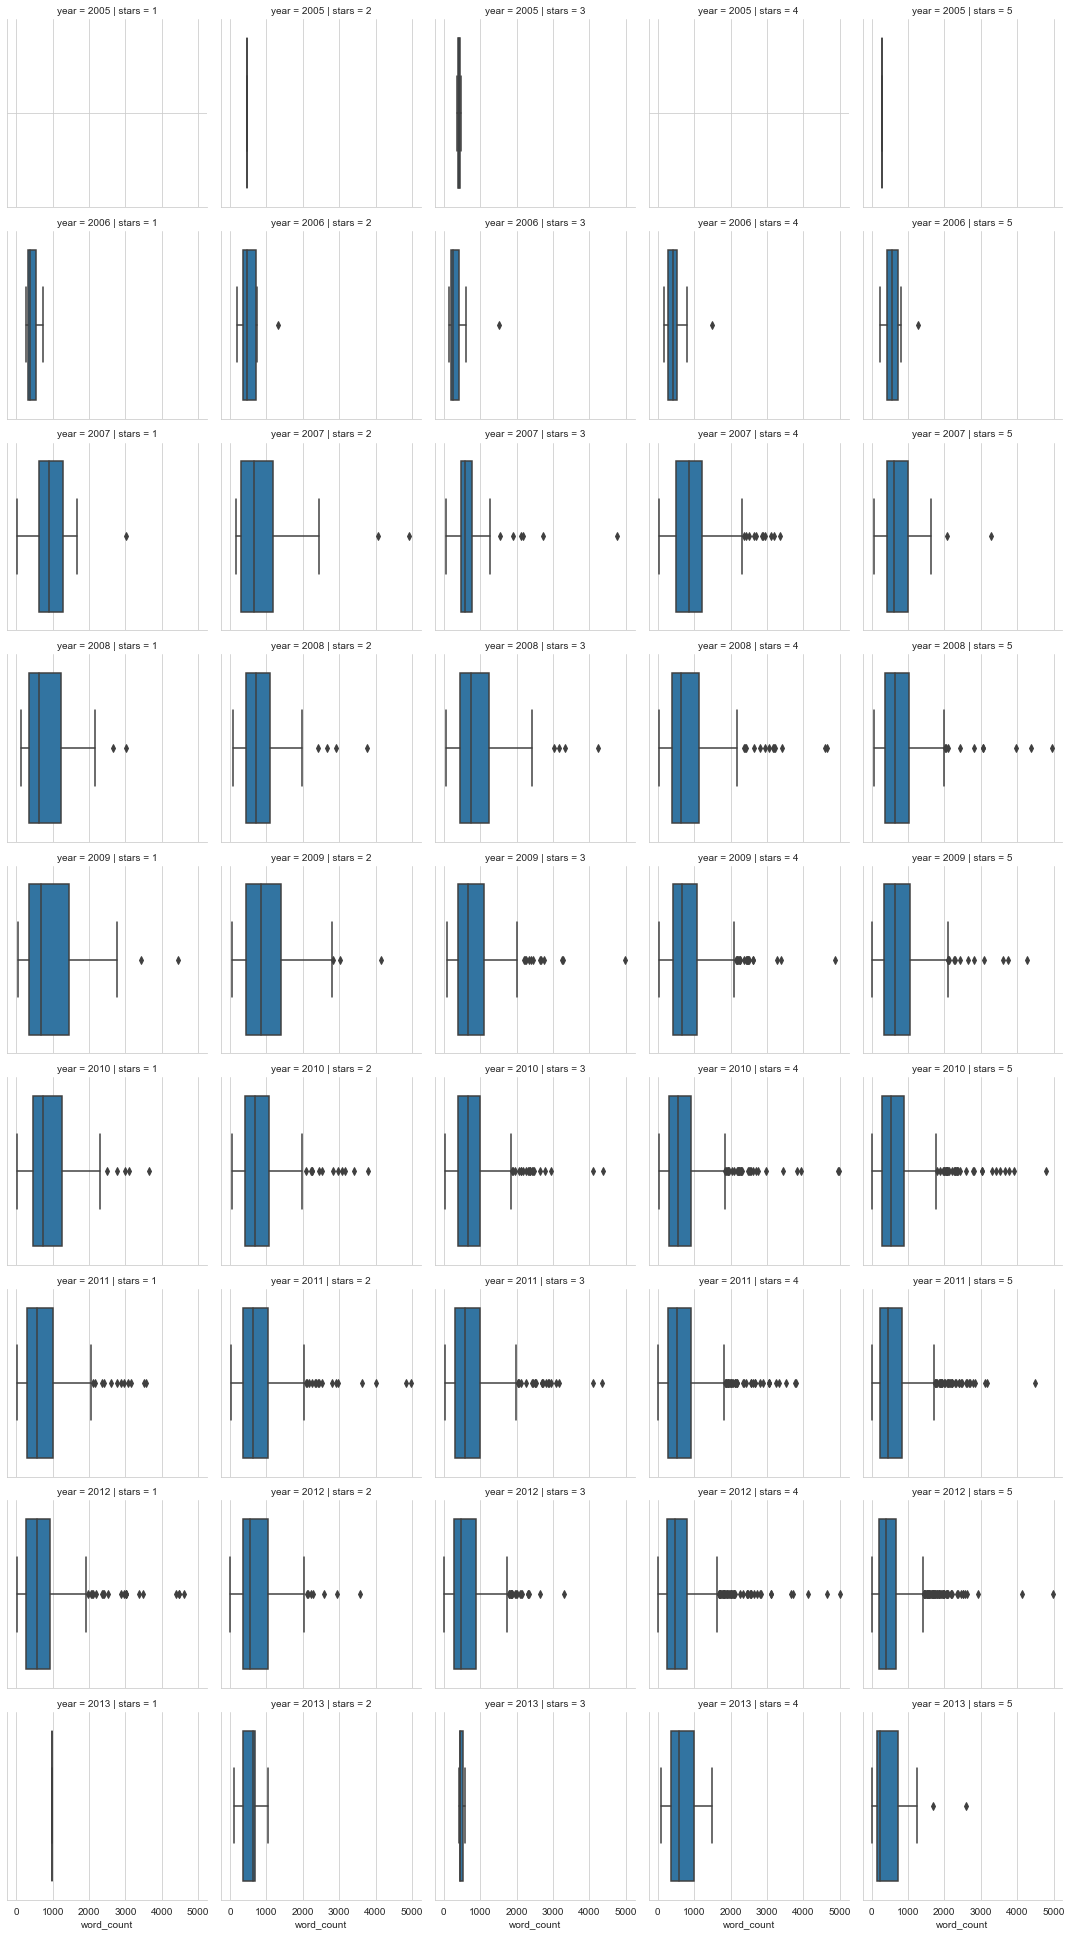

In [27]:
# sns.boxplot(x = 'stars', y = 'word_count', data = yelp)
sns.set_style('whitegrid')
g = sns.FacetGrid(data=yelp, col='stars',row='year')
g = g.map(sns.boxplot, 'word_count')

***
### From box plot above, there is trend of reducing word_count from lower to higher stars/ratings (low star word_count almost always exceed 1000)
### May be people elaborate more on bad than good experiences
### Lets check whether cool, funny,useful has a correlation with word_count
***

<AxesSubplot:>

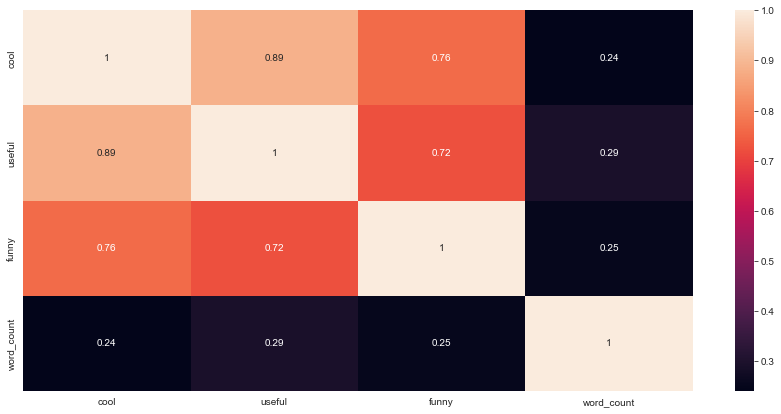

In [28]:
sns.heatmap(yelp[['cool', 'useful', 'funny', 'word_count']].corr(), annot = True)

***
### Doesnt look they have any impact on the word_count
### Check yearly whether its impact below
***

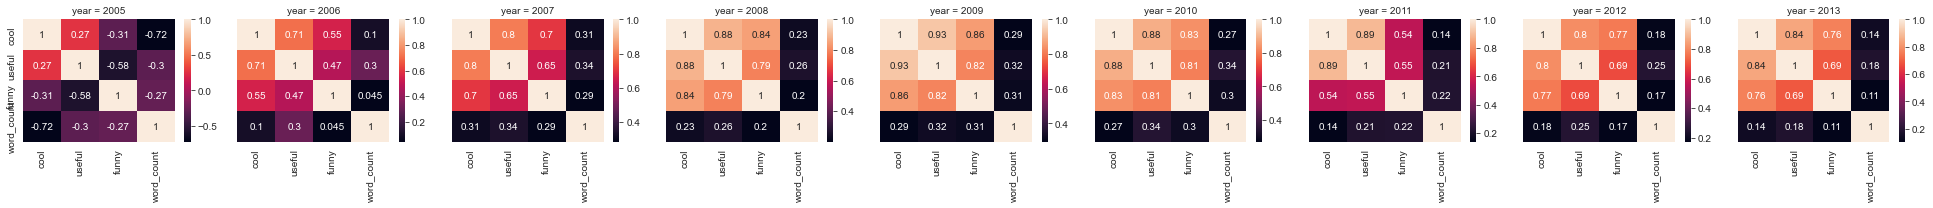

In [29]:
sns.set_style('whitegrid')
g = sns.FacetGrid(yelp[['cool', 'useful', 'funny', 'word_count', 'year']], col='year', aspect=30/30)
g.map_dataframe(lambda data, color: sns.heatmap(data[['cool', 'useful', 'funny', 'word_count']].corr(), linewidths=0, annot=True))

***
### word_count column does not show any light color(strong correlation) for any of the year which means from plot, there is not correlation as such between (cool, funny, useful) and word_count
***

In [30]:
ner = spacy.load('en_core_web_sm')
yelp['NER'] = yelp['text'].apply(lambda x: ' '.join([str(span) for span in ner(x).ents]))
yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,year,month,quarter,weekend,word_count,NER
7945,B8ujMtvvpHyEQ2r_QlAT2w,2005-04-18,kwxmuNqc5EcaErD2zYpoKw,5,"Wood fired pizzas, scrumptious pasta dishes an...",review,6VZNGc2h2Bn-uyuEXgOt5g,5,3,0,2005,4,2,False,276,
1817,7xbTnoyaai4JTkZ8rFPQTA,2005-07-03,H7tCJThvVA7a96c-x1mKnQ,2,Happy hour in Phoenix from 5PM to midnight on ...,review,VxRPbgauDdOcA3eg1uazXA,0,3,0,2005,7,3,True,459,hour Phoenix 5PM Thursdays 100 Phoenix
9743,E28ht8IEiO6FZbKktSo0Xw,2005-07-10,ZLV71s7RzywyPiBT-6TIKQ,3,You're in 120 degree Scottsdale weather and yo...,review,VxRPbgauDdOcA3eg1uazXA,2,2,0,2005,7,3,True,481,120 Scottsdale Tommy Bahama one Tommy
4383,TnKMo7BnsbqFaeNL1GY3og,2005-12-16,lPGD4Ys57SpbC44_IqXwPg,3,decent. the potstickers were kind of good. I...,review,trGepkam5MTXDn4HBucdxw,1,2,1,2005,12,4,False,354,second
7170,8_wUsDlOE8Guecq5RZZjDg,2006-01-08,7ZujDqlte3aoLmFsa4P3oQ,1,I went here because all my friends were peeing...,review,wJp8U2qXl_jYUgyW9thjGA,0,1,4,2006,1,1,True,273,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,nts2OALwvyvfNh9focRZ3w,2013-01-05,DtfqqQryMmDWyRTdMx2XlQ,4,Great food. Service consistently blows. Sit at...,review,GZoFh9dJdp3FYk6FLDXs-w,1,1,1,2013,1,1,False,76,
2620,9PrgqakLyqlxTTqvvfYNyA,2013-01-05,BedRV23Sb9fE03Y9eH7Jzw,4,I was a little bit scared to eat at this place...,review,jk_P-yYspg7uz-8xSCRdGA,0,0,0,2013,1,1,False,350,Buffett
633,29hR24tcAM3JZaXfA5xCxQ,2013-01-05,lI8Bo4AMQT7C-zNLgvRasw,4,My husband surprised me with a stay-cation at ...,review,PWtlBs3PCH1l0DdypgEszw,0,1,0,2013,1,1,False,1483,the Westin Resort for the weekend our first ni...
2264,bOB11LVavtN9PWTNwR52Tw,2013-01-05,DccfWDQOIKe4Cp8uuDwtjw,4,It appears that the service kinks have been wo...,review,UQUXdHJx2XmRMdXtMR6dtQ,1,1,0,2013,1,1,False,634,Guacamole Barrio Queen Mexican


***
### Lets see most frequent words in NER's
***

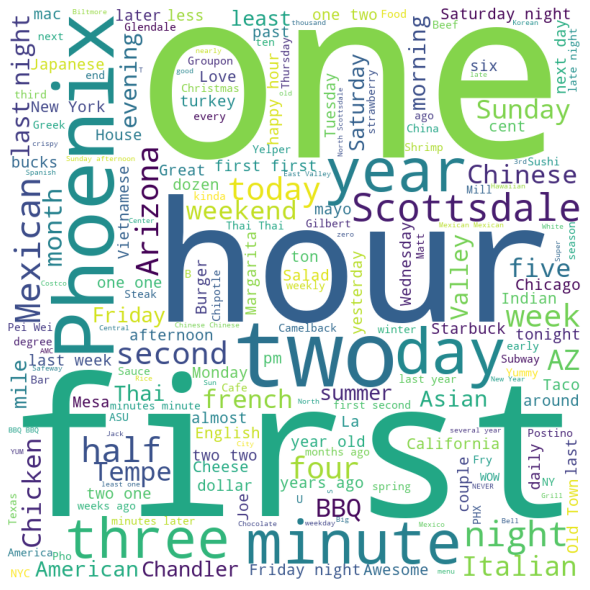

In [31]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(' '.join(yelp['NER']))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

***
### We can see some city names (Scottsdale, california, New York), some cuisines like (Italian, Indian, French, American, Chinese, Mexican), 
### some brand names like (Starbucks, Joe's, BBQ), some food/drink items like(Margarita, chicken, Steak..).
### We see whats going on in reviews and what/which place people are talking about.

### Lets try to remove stopwords and some other words like 'first, second, ....one , three..from NER's 
***

In [32]:
stopwords_custom = stopwords.words('english')
stopwords_custom = np.concatenate((stopwords_custom, ['one', 'hour', 'two', 'year', 'day', 'three', 'first', 'today', 'first', 'five', 'second', 'four']))

yelp['NER_Without_StopWords'] = yelp['NER'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stopwords_custom]) )

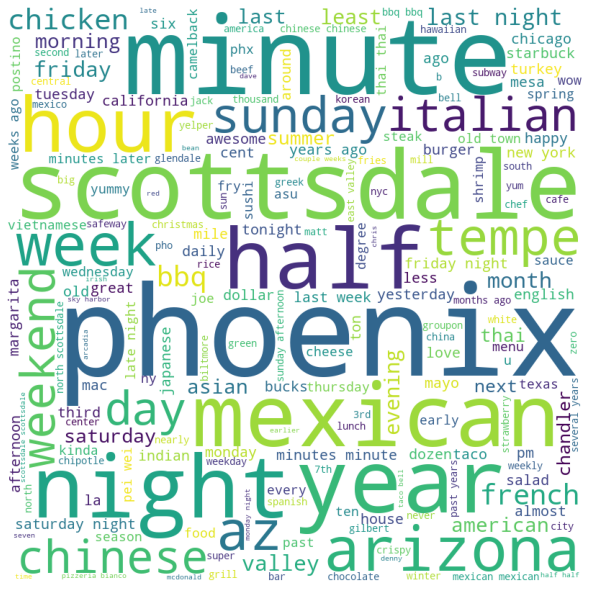

In [33]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(' '.join(yelp['NER_Without_StopWords']))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

***
### Now its more clear picture about what people have talked most about.
### There is a lot of reviews in Phoenix, scottsdale, arizona about mexican, chinese, italian food.
### We see there is mention of time (morning, aternoon, evening, night) and days (sunday, saturday, friday...), even seasons (summer)
***

***
### Preprocessing Text
***

In [34]:

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

contractions_dict = {     
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

def lemmatize( text):
    """
    take string input and lemmatize the words.
    use WordNetLemmatizer to lemmatize the words.
    """
    word_tokens = nltk.word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    return (" ".join(lemmatized_word))

def remove_numbers(text):
    """
    take string input and return a clean text without numbers. 
    Use regex to discard the numbers.
    """
    output = ''.join(c for c in text if not c.isdigit())
    return output

def remove_punct(text):
    """
    take string input and clean string without punctuations.
    use regex to remove the punctuations.
    """
    return ''.join(c for c in text if c not in punctuation)

def remove_stopwords(sentence):
    """
    removes all the stop words like "is,the,a, etc."
    5 lines of code can be written in one line as:
        return ' '.join([w for w in word_tokenize(sentence) if not w in stop_words]) 
    """
    clean_sent =[]
    for w in word_tokenize(sentence):
        if not w in stop_words:
            clean_sent.append(w)
    return " ".join(clean_sent)

def remove_Tags(text):
    """
    take string input and clean string without tags.
    use regex to remove the html tags.
    """
    cleaned_text = re.sub('<[^<]+?>','', text)
    return cleaned_text

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def sentence_tokenize(text):
    """
    take string input and return list of sentences.
    use nltk.sent_tokenize() to split the sentences.
    """
    sent_list=[]
    for w in nltk.sent_tokenize(text):
        sent_list.append(w)
    return sent_list

def autospell(text):
    """
    correct the spelling of the word.
    """
    spells = [Speller().autocorrect_word(w) for w in (nltk.word_tokenize(text))]
    return " ".join(spells)

def stemming(text):
    """
    take string input and stem the words.
    use snowball_stemmer to stem the string.
    """
    word_tokens = nltk.word_tokenize(text)
    stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
    return " ".join(stemmed_word)

def to_lower(text):
    """
    Converting text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
    """
    return ' '.join([w.lower() for w in word_tokenize(text)])

def word_tokenize( text):
    """
    take string input and return list of words.
    use nltk.word_tokenize() to split the words.
    """
    word_list=[]
    for sentences in nltk.sent_tokenize(text):
        for words in nltk.word_tokenize(sentences):
            word_list.append(words)
    return word_list

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
    #remove_accented_chars('Sómě Áccěntěd těxt')

def remove_linebreaks(text):
    return text.replace('\n', ' ').replace('\r', ' ')

def remove_IP(text):
    # declaring the regex pattern for IP addresses
    # text_after = re.sub(regex_search_term, regex_replacement, text_before)
    return re.sub(r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})', '', text)
    #sample_ip = '123.268.2.1 test1 256.122.12.122'
    #remove_IP(sample_ip)

def remove_URL(text):
    return re.sub(r'http\S+', '', text)
    #sample_text = 'this is link for https://lms.simplilearn.com/courses/3817/PG-DS---Natural-Language-Processing/assessment simplilearn....another link https://www.google.com/'
    #remove_URL(sample_text)

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def pre_process1( text):
    """
    """
    text = remove_accented_chars(text)
    text = expand_contractions(text, contractions_dict)
    text = remove_punct(text)
    text = autospell(text)
    text = to_lower(text)
    text = remove_stopwords(text)
    text = remove_numbers(text)
    #text = lemmatize(text)
    text = stemming(text)
    text = word_tokenize(text)
    return ' '.join(text)


def pre_process2(text):
        lower_text = to_lower(text)
        sentence_tokens = sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = lemmatize(each_sent)
            clean_text = remove_numbers(lemmatizzed_sent)
            clean_text = remove_punct(clean_text)
            clean_text = remove_Tags(clean_text)
            clean_text = remove_stopwords(clean_text)
            word_tokens = word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list

def pre_processing3(document):
  #1. Remove Punctuations
  sentWithoutPunct = ''.join([char for char in document  if char not in string.punctuation])
  #2. Extract words out of the sentences
  words = sentWithoutPunct.split()
  #3. Normalize the data (lowercase)
  wordNormalized = [word.lower() for word in words]
  # 4. Remove Stopwords
  vocabulary = [word for word in wordNormalized if word not in stopwords.words('english')]
  # 5. Apply Stemming
  # a. Exclude those words with NER prop 
  ner_words = [tokens.text for tokens in ner(document).ents]
  # b. perform Stemming with other words
  stemmed = [PorterStemmer().stem(word) for word in vocabulary if word not in ner_words]

  return stemmed

def preprocess_4(text):
    text = remove_IP(text)
    text = remove_URL(text)
    
    # text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    # text = re.sub(r'@', '', text)
    # text = re.sub(r'#', '', text)
    # text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    # text = re.sub("'s", "", text)
    
    text = remove_linebreaks(text)
    #text = remove_accented_chars(text)
    #text = expand_contractions(text, contractions_dict)
    text = remove_punct(text)
    text = to_lower(text)
    text = remove_stopwords(text)
    text = remove_numbers(text)
    #text = lemmatize(text)
    text = stemming(text)
    text = word_tokenize(text)
    
    return ' '.join(text)


***
### load the EDA pickled Dataframe to continue Model Building
***

In [35]:
# save this data since it took 10 hrs to preprocess text
#yelp.to_pickle('yelpdat_with_preprocessed_text.pkl')

# read pickled dataframe we prepared after preprocessing text which tool a avery long time
# yelp = pd.read_pickle('yelpdat_with_preprocessed_text.pkl')
# yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,year,month,quarter,weekend,word_count,NER,NER_Without_StopWords,preprocessed_text
7945,B8ujMtvvpHyEQ2r_QlAT2w,2005-04-18,kwxmuNqc5EcaErD2zYpoKw,5,"Wood fired pizzas, scrumptious pasta dishes an...",review,6VZNGc2h2Bn-uyuEXgOt5g,5,3,0,2005,4,2,False,276,,,wood fire pizza scrumptious pasta dish bacon w...
1817,7xbTnoyaai4JTkZ8rFPQTA,2005-07-03,H7tCJThvVA7a96c-x1mKnQ,2,Happy hour in Phoenix from 5PM to midnight on ...,review,VxRPbgauDdOcA3eg1uazXA,0,3,0,2005,7,3,True,459,hour Phoenix 5PM Thursdays 100 Phoenix,phoenix 5pm thursdays 100 phoenix,happi hour phoenix pm midnight thursday yes de...
9743,E28ht8IEiO6FZbKktSo0Xw,2005-07-10,ZLV71s7RzywyPiBT-6TIKQ,3,You're in 120 degree Scottsdale weather and yo...,review,VxRPbgauDdOcA3eg1uazXA,2,2,0,2005,7,3,True,481,120 Scottsdale Tommy Bahama one Tommy,120 scottsdale tommy bahama tommy,degre scottsdal weather need casual chang clot...
4383,TnKMo7BnsbqFaeNL1GY3og,2005-12-16,lPGD4Ys57SpbC44_IqXwPg,3,decent. the potstickers were kind of good. I...,review,trGepkam5MTXDn4HBucdxw,1,2,1,2005,12,4,False,354,second,,decent potstick kind good realli know expect m...
7170,8_wUsDlOE8Guecq5RZZjDg,2006-01-08,7ZujDqlte3aoLmFsa4P3oQ,1,I went here because all my friends were peeing...,review,wJp8U2qXl_jYUgyW9thjGA,0,1,4,2006,1,1,True,273,,,went friend pee pant good wrong slow perhap re...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,nts2OALwvyvfNh9focRZ3w,2013-01-05,DtfqqQryMmDWyRTdMx2XlQ,4,Great food. Service consistently blows. Sit at...,review,GZoFh9dJdp3FYk6FLDXs-w,1,1,1,2013,1,1,False,76,,,great food servic consist blow sit bar fine
2620,9PrgqakLyqlxTTqvvfYNyA,2013-01-05,BedRV23Sb9fE03Y9eH7Jzw,4,I was a little bit scared to eat at this place...,review,jk_P-yYspg7uz-8xSCRdGA,0,0,0,2013,1,1,False,350,Buffett,buffett,littl bit scare eat place pleasant surpris got...
633,29hR24tcAM3JZaXfA5xCxQ,2013-01-05,lI8Bo4AMQT7C-zNLgvRasw,4,My husband surprised me with a stay-cation at ...,review,PWtlBs3PCH1l0DdypgEszw,0,1,0,2013,1,1,False,1483,the Westin Resort for the weekend our first ni...,westin resort weekend night omg yum great,husband surpris staycat westin resort weekend ...
2264,bOB11LVavtN9PWTNwR52Tw,2013-01-05,DccfWDQOIKe4Cp8uuDwtjw,4,It appears that the service kinks have been wo...,review,UQUXdHJx2XmRMdXtMR6dtQ,1,1,0,2013,1,1,False,634,Guacamole Barrio Queen Mexican,guacamole barrio queen mexican,appear servic kink work server attent food cam...


In [36]:
features = yelp['preprocessed_text'].apply(preprocess_4)
label = yelp['stars']

In [37]:
cv = CountVectorizer()
bow = cv.fit_transform(features)
tfidf = TfidfTransformer()
features_transformed = tfidf.fit_transform(bow)

In [38]:
X = pd.DataFrame(features_transformed.todense(), index = yelp.index, columns=cv.get_feature_names()).reset_index(drop=True)
X['cool_vikas_feat'] = yelp.cool
X['useful_vikas_feat'] =  yelp.useful
X['funny_vikas_feat'] = yelp.funny
X

,aa,aaa,aaaaaalright,aaaamaz,aaammmazz,aaand,aah,aand,aaron,aarp,...,zupa,zur,zuzu,zuzus,zweigel,zwiebelkraut,zzzzzzzzzzzzzzzzz,cool_vikas_feat,useful_vikas_feat,funny_vikas_feat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=10, test_size=0.2)

In [47]:
from sklearn.linear_model import SGDClassifier

over_under = SMOTETomek(tomek=TomekLinks(sampling_strategy='auto'), random_state=42)
X_resampled, y_resampled = over_under.fit_resample(X_train, y_train)



sg = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-5, random_state=42, max_iter=100, learning_rate='adaptive', eta0=0.01, tol=None, n_jobs=-1)
sg.fit(X_resampled, y_resampled)

y_pred_test = sg.predict(X_test)
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           1       0.52      0.46      0.49       156
           2       0.36      0.38      0.37       191
           3       0.29      0.35      0.32       235
           4       0.51      0.47      0.49       736
           5       0.62      0.63      0.63       682

    accuracy                           0.50      2000
   macro avg       0.46      0.46      0.46      2000
weighted avg       0.51      0.50      0.50      2000



***
### SL = 0.45
### CL = 0.55
### For now SGDClassifier shows better results than Decision tree. Candidates for hyper parameter tuning
### Next step to hyper parameter tune the SGDClassifier since its closest to CL
***

In [48]:
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE, SVMSMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

over_under = SMOTETomek(tomek=TomekLinks(sampling_strategy='auto'), random_state=42)
X_resampled, y_resampled = over_under.fit_resample(X_train, y_train)

sg = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1, n_estimators=500)
sg.fit(X_resampled, y_resampled)

y_pred_test = sg.predict(X_test)
print(classification_report(y_pred_test, y_test))


              precision    recall  f1-score   support

           1       0.49      0.60      0.54       113
           2       0.13      0.40      0.20        67
           3       0.20      0.31      0.24       185
           4       0.51      0.43      0.47       800
           5       0.69      0.58      0.63       835

    accuracy                           0.49      2000
   macro avg       0.41      0.47      0.42      2000
weighted avg       0.55      0.49      0.51      2000



***
CL = 0.55
Choosing weighted averate since its closent to the CL..deploy
***
